# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [4]:
# Add a column of a Difference in stock price
df["Diff"] = df["Adj Close"].diff().shift(-1)
 
# target
df["Target"] = np.sign(df["Diff"])

#pr
df["Premium"] = .08* df["Adj Close"]

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [7]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [8]:
# fit a log reg

logreg = LogisticRegression()

logreg.fit(X,y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [9]:
y_pred = logreg.predict(X)

In [10]:
df["Predictions"] = y_pred

In [11]:
df["Profits"]= 0

In [13]:
#True Positive Profits
df.loc[(df["Target"] == 1) & (df["Predictions"] == 1), "Profits"] = df["Premium"]

#False Positive
df.loc[(df["Target"]== -1)& (df["Predictions"] == 1), "Profits"] = (100*df["Diff"]) + df["Premium"]


# 5.) Plot profits over time

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

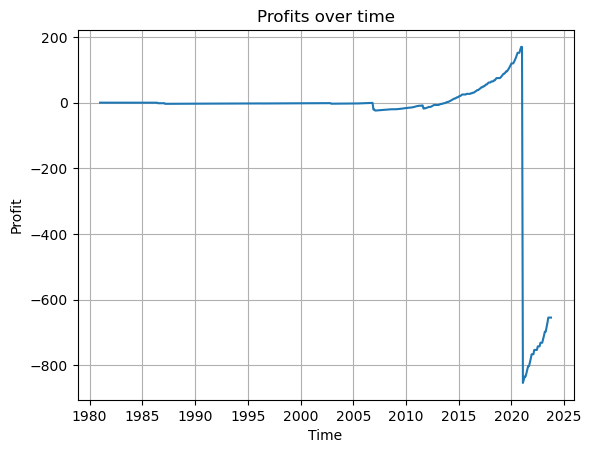

In [14]:
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.ylabel("Profit")
plt.xlabel("Time")
plt.title("Profits over time")
plt.plot


## 5.5 SHORT WRITE UP ABOUT APPLICATION OF SKILLS

Data visualization is important to personally conceptualize how general trends in different asset prices have changed over time, and they are eminently useful in presenting these ideas to the general public and potential clients. One skill that this class teaches is the ability to take this data and create ways of formatting it that can be tailored to need or preferences of the intended audience. There is no limit of ways that one can present information and no limit to the amount of information available, and there are now machines which can do this almost as well as people and sometimes better. What makes this class uniquely valuable is the perspective to distill this information and to identify those that are best suite for a particular audience. On its own, the vast quantities of information can overwhelm anyone, and so the ability to find 3-4 pieces that ought to be prioritize and know the best format to use when presenting them are the competitive edge that will distinguish competent data scientists from an online mass public algorithm.

# 6.) Create a loop that stores total profits over time

In [ ]:
DO NOT DO

# 7.) What is the optimal threshold and plot the total profits for this model.

In [ ]:
DO NOT DO